In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('eval.csv')

(0.2, 0.75)

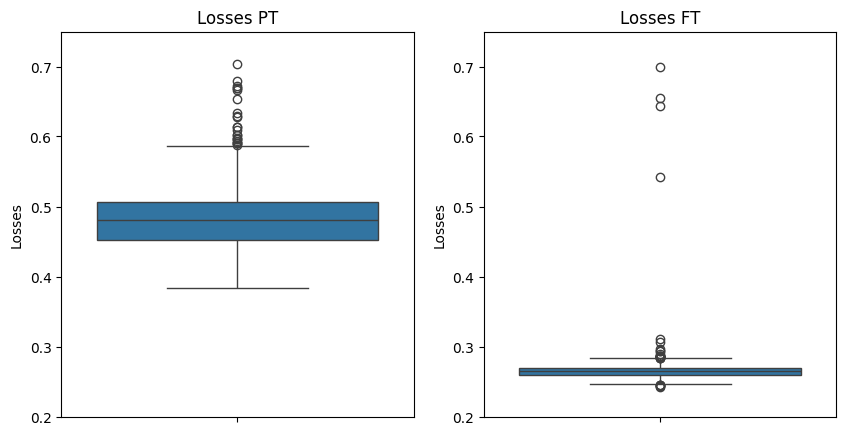

In [3]:
#two losses subplots

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot( y='losses_pt', data=data, ax=ax[0])
sns.boxplot( y='losses_ft', data=data, ax=ax[1])

ax[0].set_title('Losses PT')
ax[1].set_title('Losses FT')


ax[0].set_ylabel('Losses')
ax[1].set_ylabel('Losses')

ax[0].set_ylim(0.2, 0.75)
ax[1].set_ylim(0.2, 0.75)

<Axes: ylabel='losses_pt'>

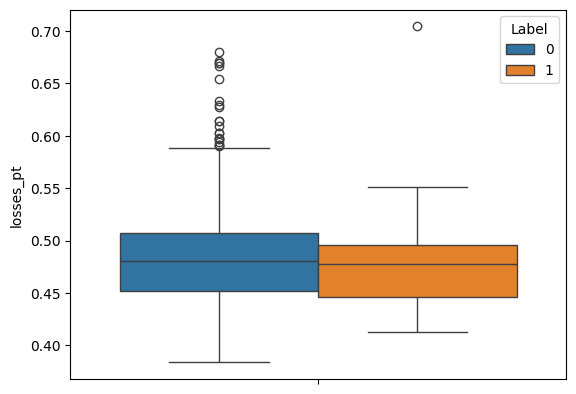

In [4]:
sns.boxplot(data=data,  y='losses_pt', hue='Label')

<Axes: ylabel='losses_ft'>

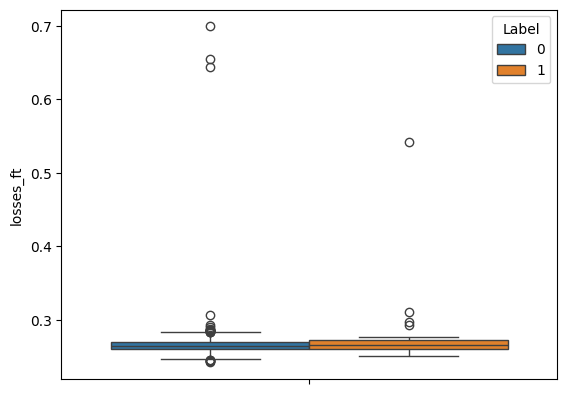

In [5]:
sns.boxplot(data=data,  y='losses_ft', hue='Label')

In [6]:
media_anomaly = data[data['Label'] == 1]['losses_ft'].mean()
media_normal = data[data['Label'] == 0]['losses_ft'].mean()

print(f'Media anomaly: {media_anomaly}')
print(f'Media normal: {media_normal}')

Media anomaly: 0.2768242667118708
Media normal: 0.2660174448772804


In [7]:

#ONE EPOCH:
## LORA 16
#Media anomaly: 0.27069377700487773
#Media normal: 0.26522882439426543

## LORA 8
#Media anomaly: 0.2718062291542689
#Media normal: 0.2666619962330946